In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

In [4]:
#Load Dataset
df=pd.read_csv("data/hdp_data.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
#Feature Engineering
#1st we'll check is there any null values and '0' indicate no null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

:Bars   [target]   (count)

In [10]:
#Evaluating according to sex
with_disease = df.loc[df['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [sex]   (count)
   .Bars.Count.II :Bars   [sex]   (count)

In [11]:
with_disease = df.loc[df['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [cp]   (count)
   .Bars.Count.II :Bars   [cp]   (count)

In [12]:
hwith_disease = df.loc[df['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [fbs]   (count)
   .Bars.Count.II :Bars   [cp]   (count)

In [13]:
with_disease = df.loc[df['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * without_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [restecg]   (count)
   .Bars.Count.II :Bars   [restecg]   (count)

In [14]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [15]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

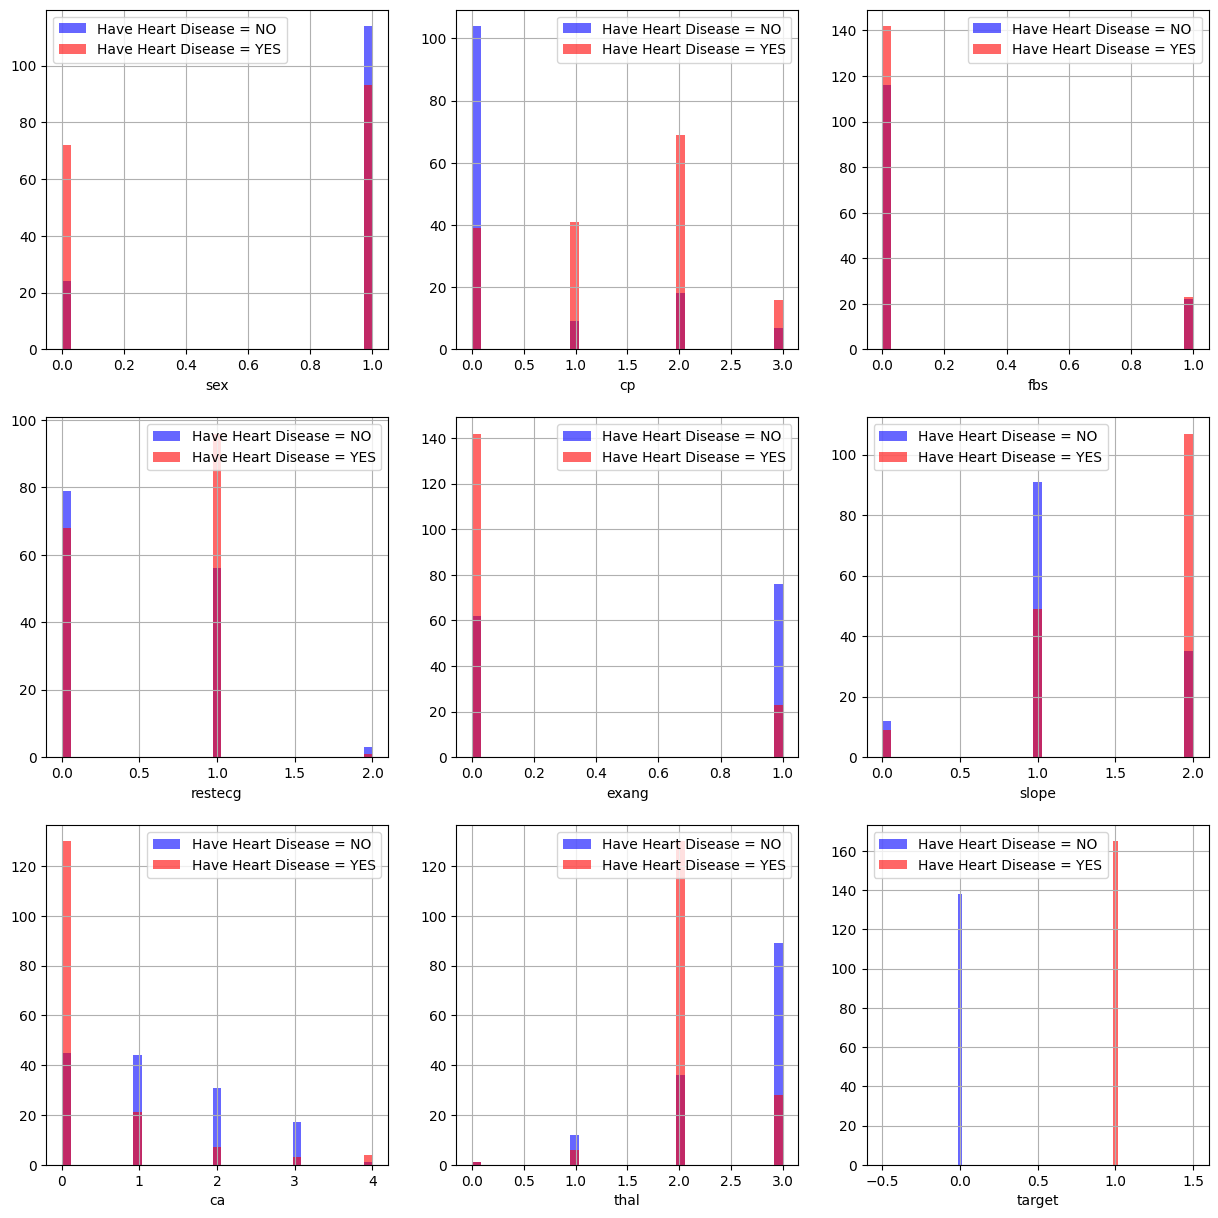

In [16]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

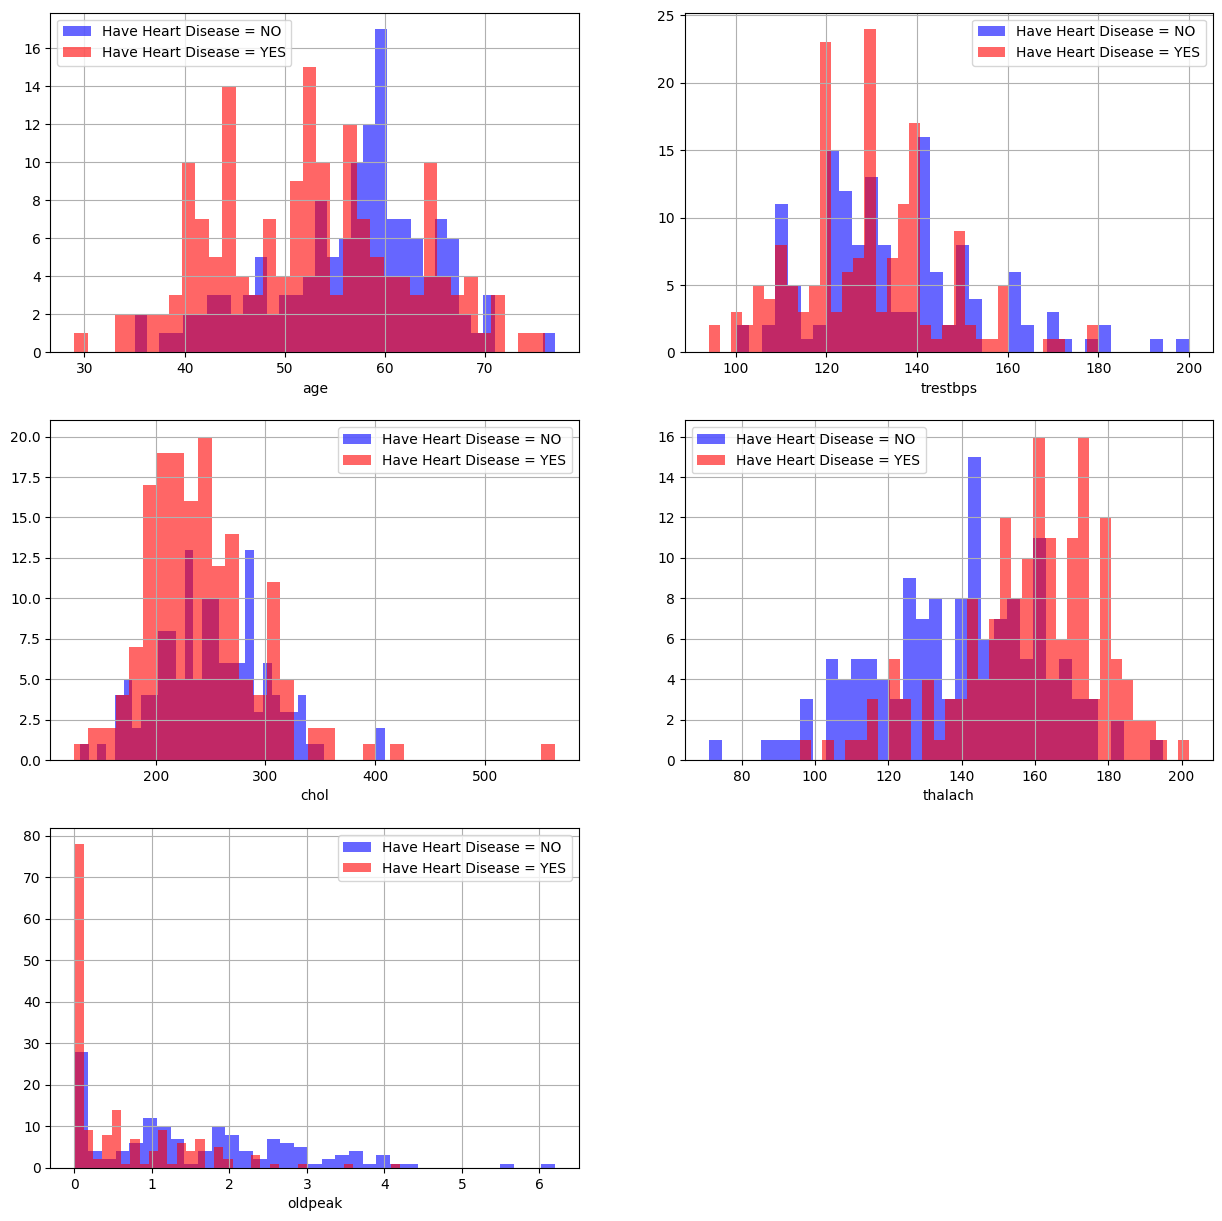

In [17]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

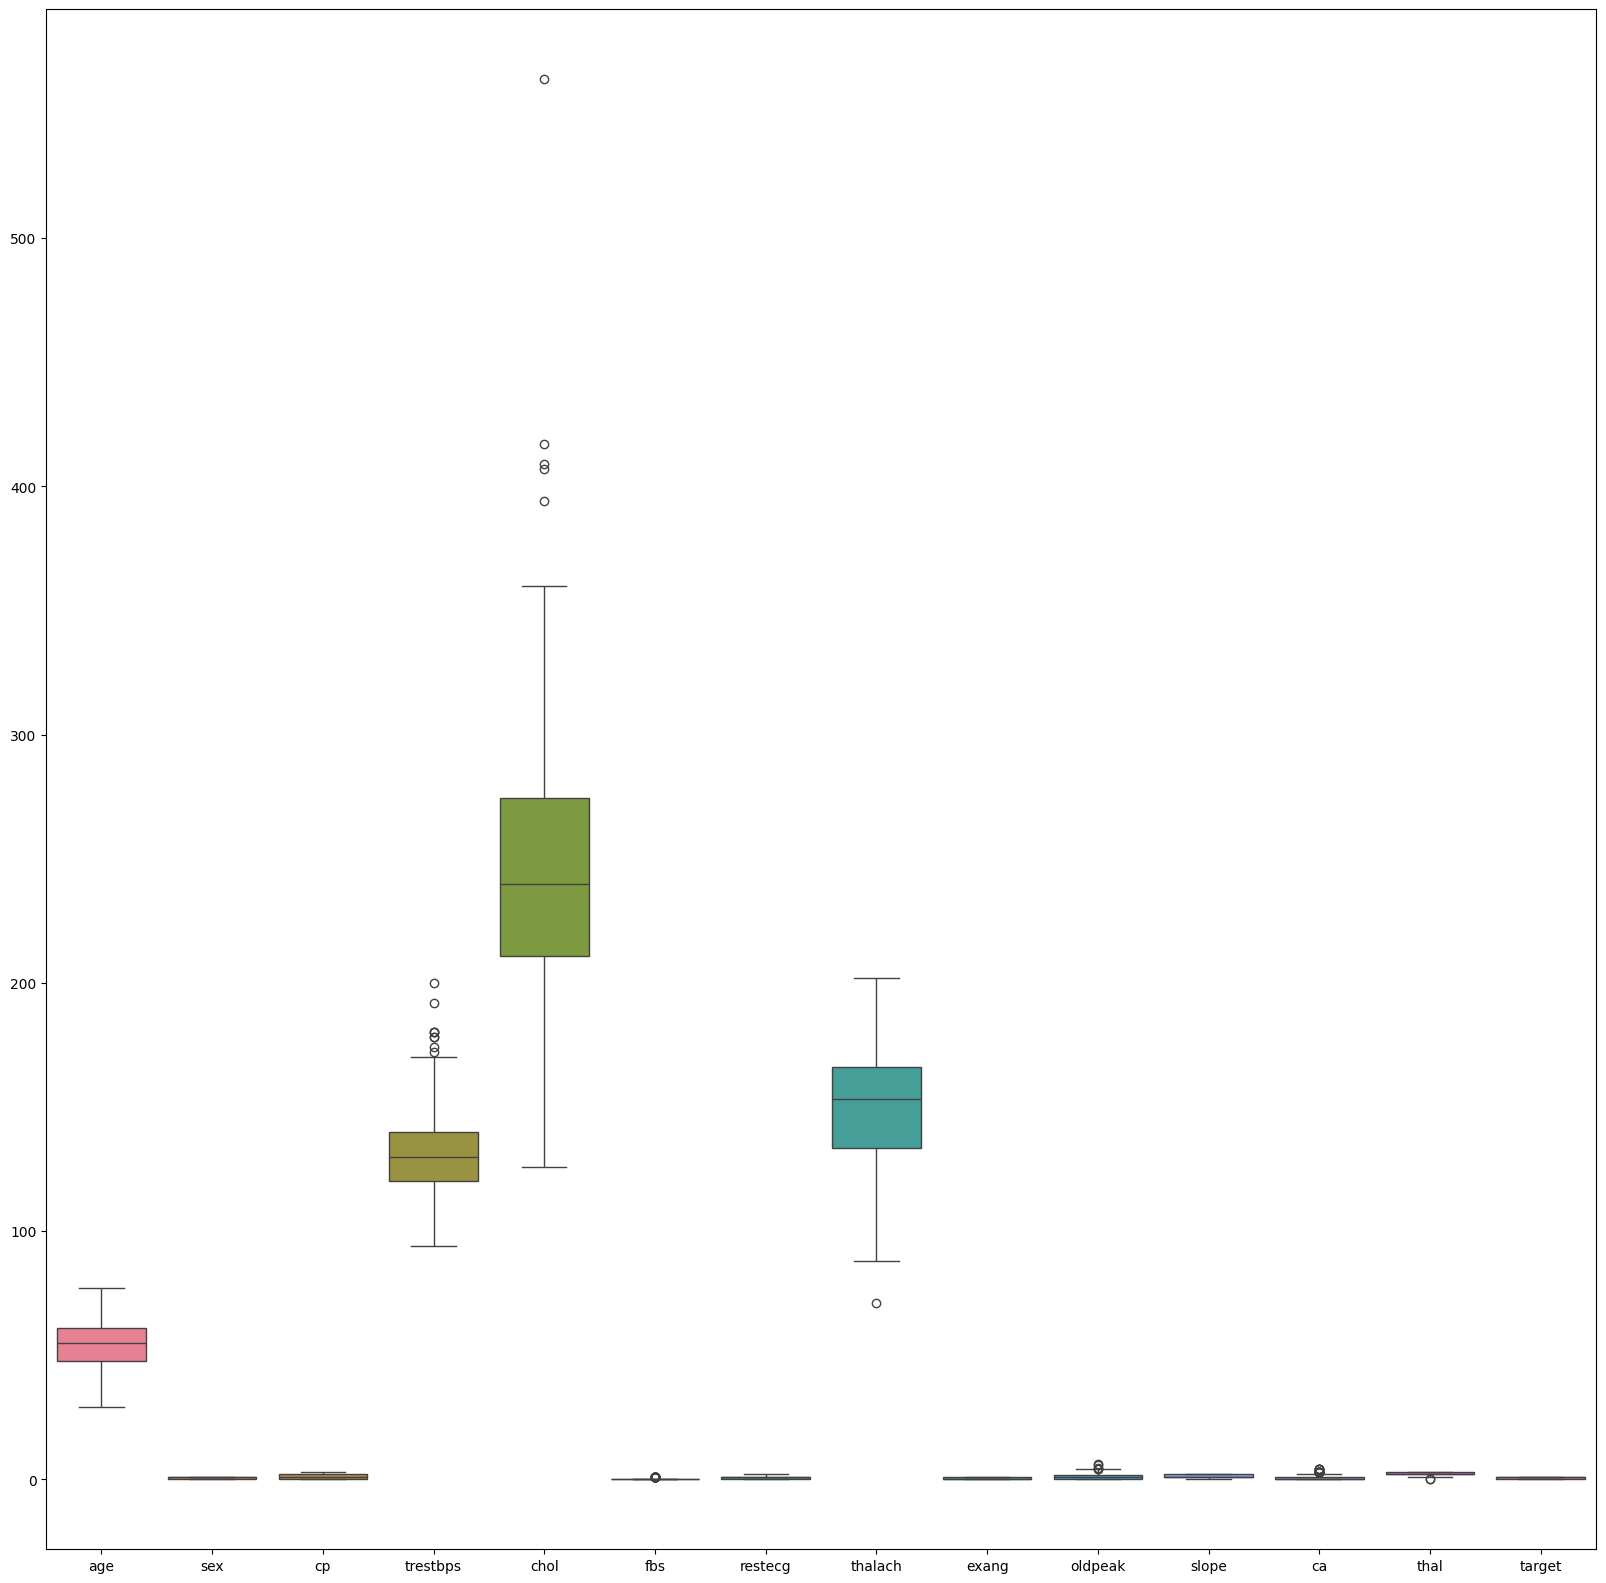

In [18]:
#after checking null values we'll check outliers in the dataset
plt.figure(figsize=(20,20))
ax=sns.boxplot(data=df)

In [19]:
 #Here we'll read and remove outlier's in the dataset using zscore matrix
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [20]:
threshold=3
# here we'll print z whose greater than third deviation
print(np.where(z > 3)) #The first array contains the list of row numbers and second array contains respective col

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [21]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [22]:
df = df[(z < 3).all(axis=1)]
df.shape #set the lower bound

(287, 14)

In [23]:
df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape #set the upper bound

(228, 14)

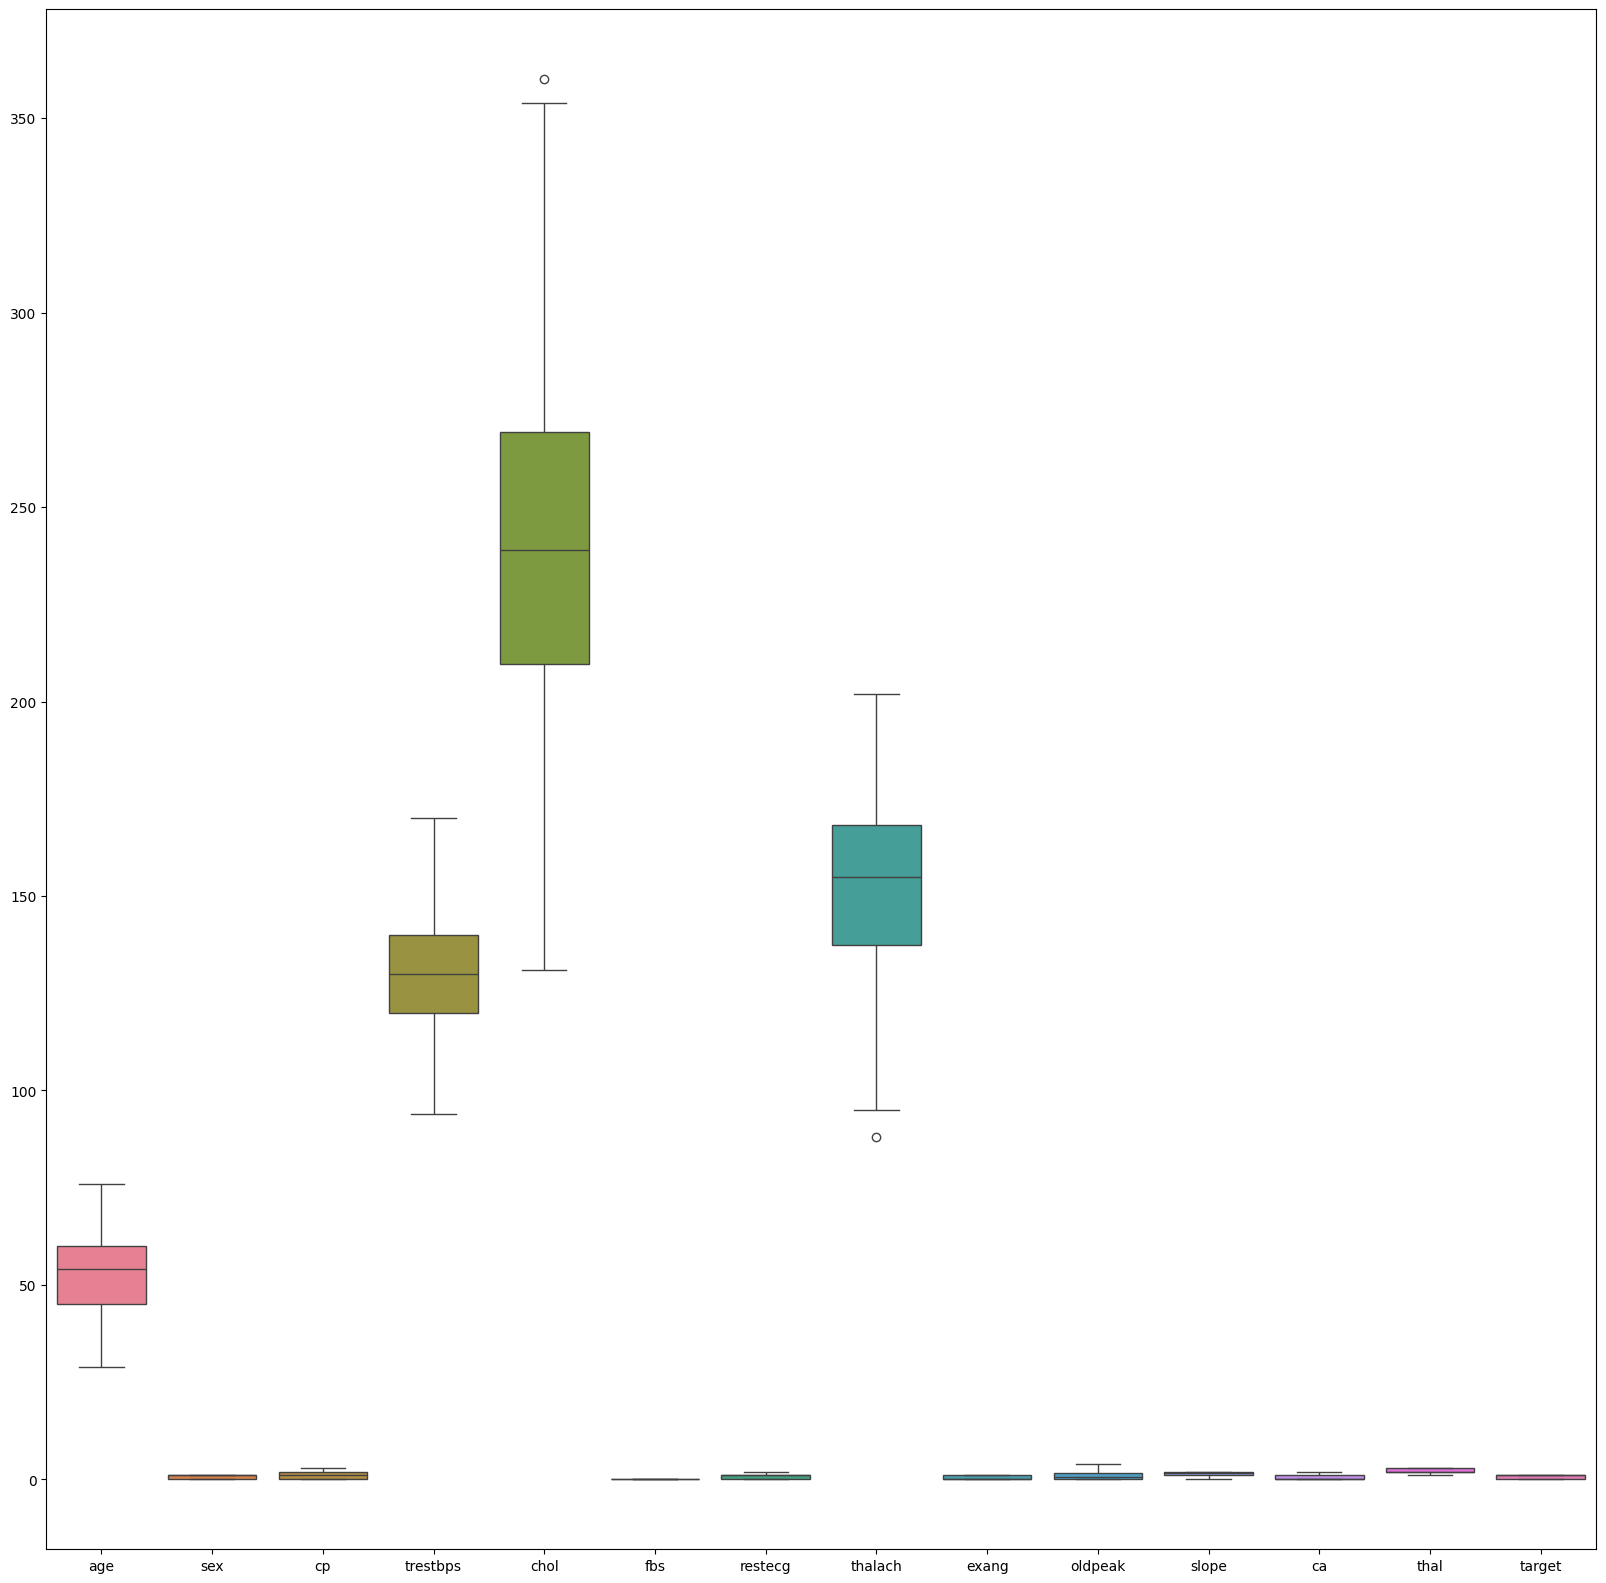

In [24]:
#To check whether the outlier's are removed
plt.figure(figsize=(20,20))
ax= sns.boxplot(data=df)

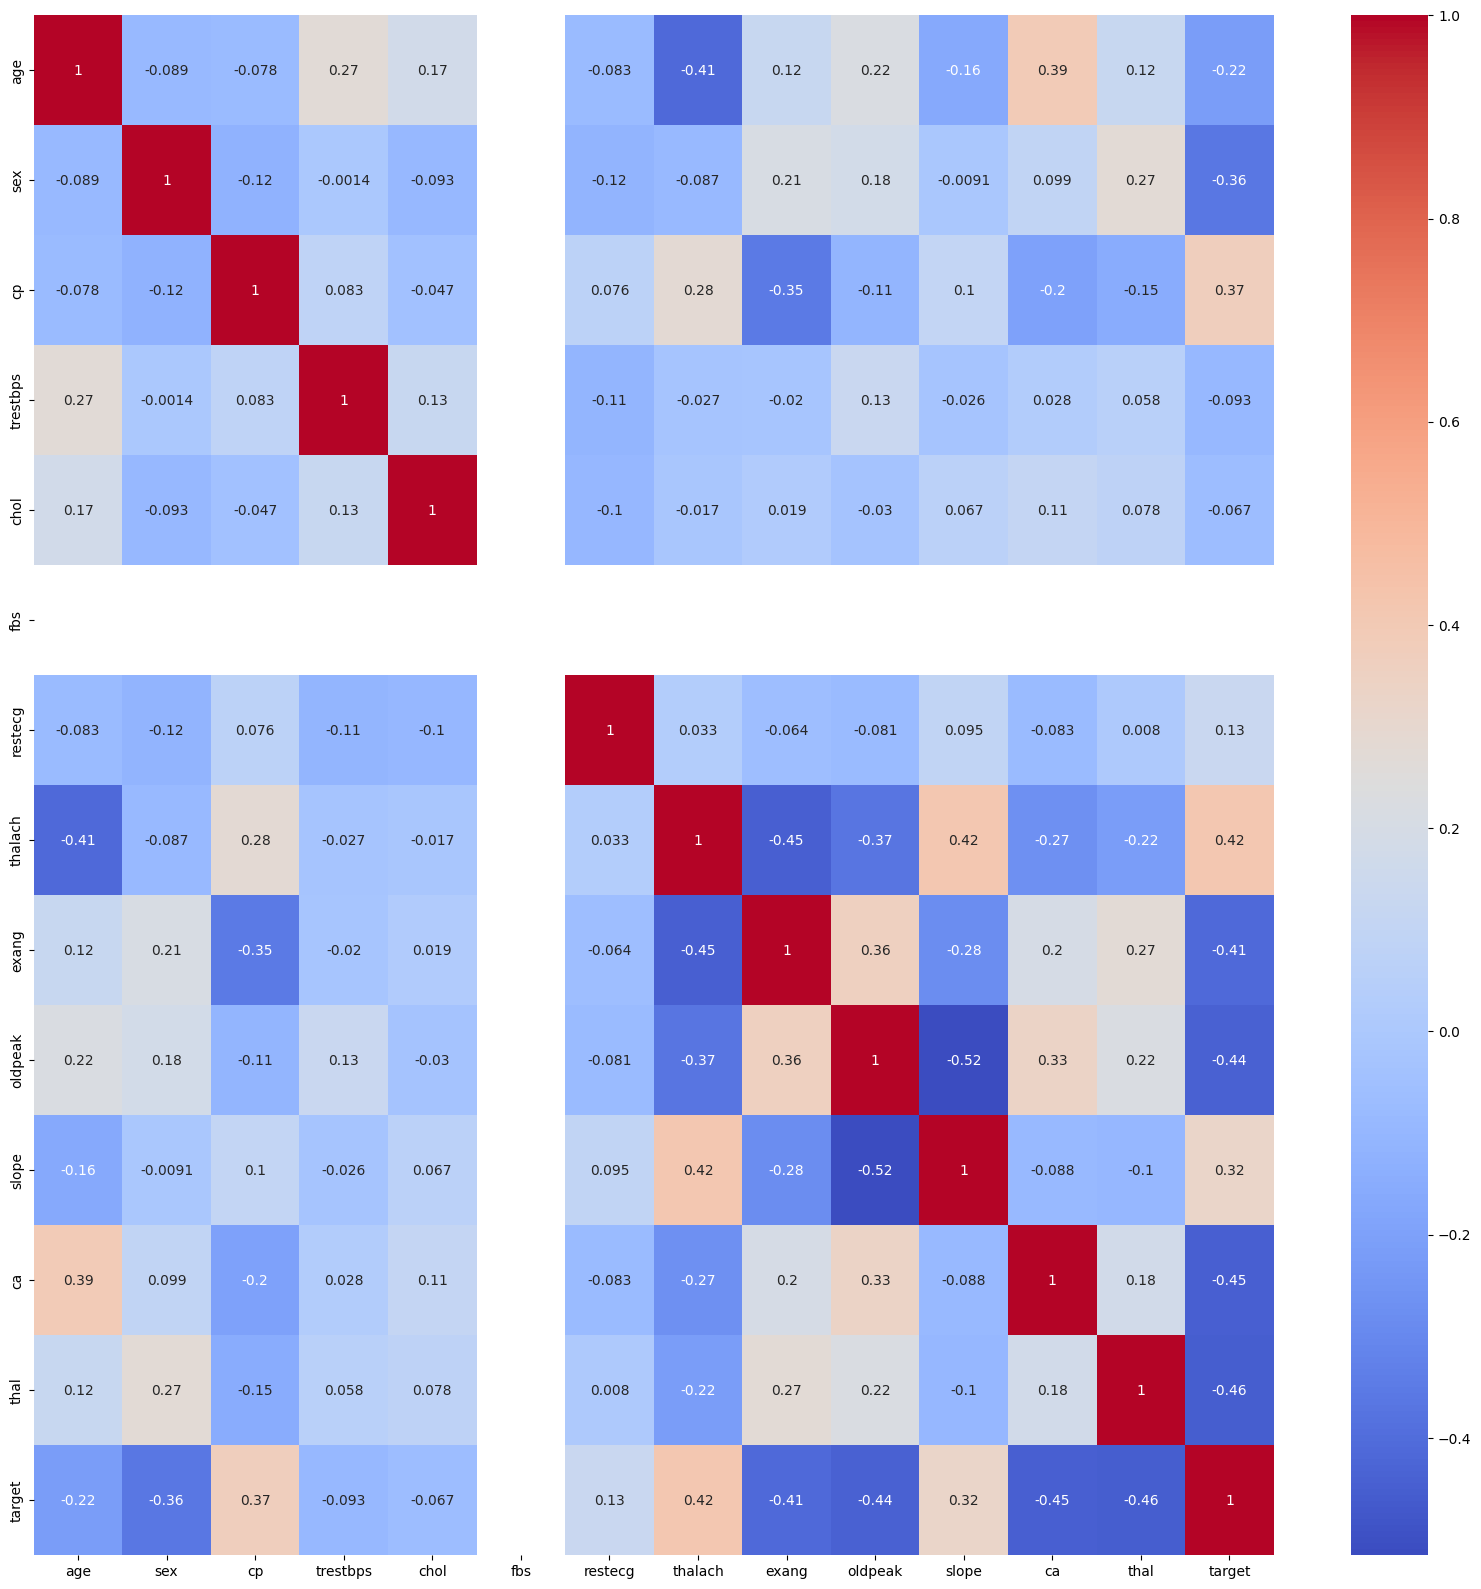

In [25]:
#feature Selection
plt.figure(figsize=(20,20))
d= sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
# red->+ve coorelation,blue->-ve coorelation ,skyblue->0 coorelation

c:\Users\Chitt\Downloads\CSCE 5214\Heart Disease Prediction\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Chitt\Downloads\CSCE 5214\Heart Disease Prediction\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


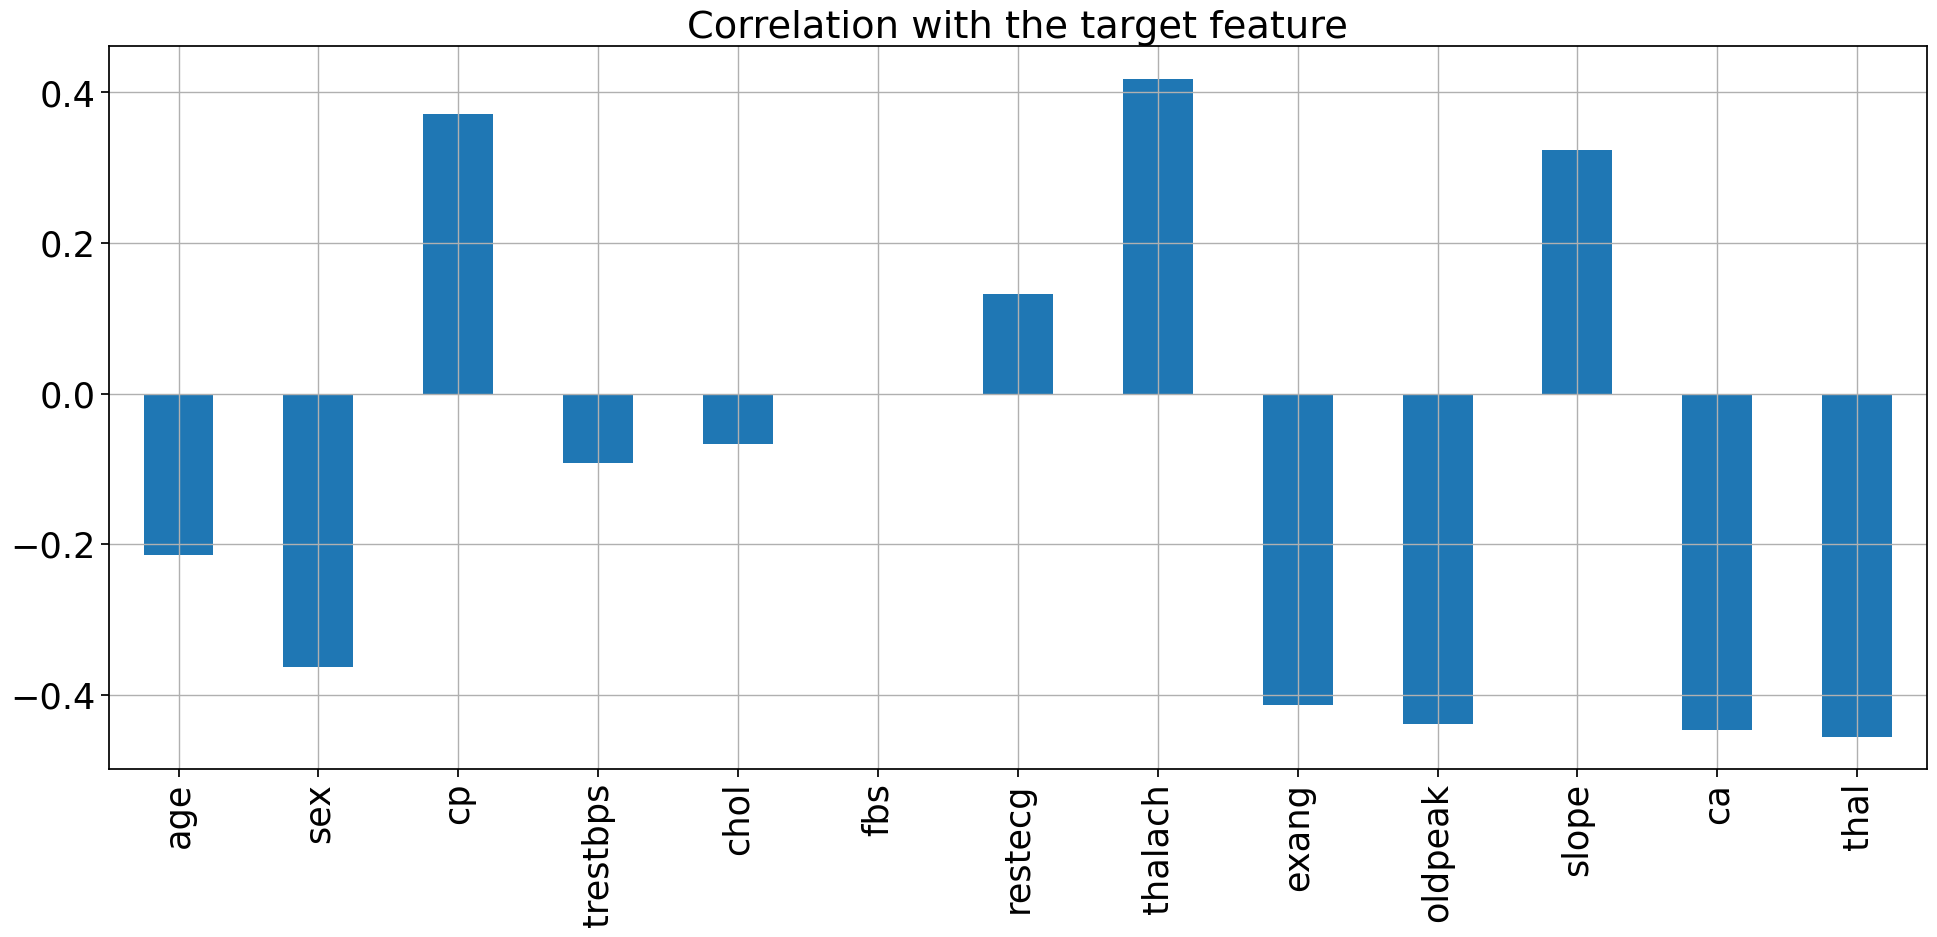

In [26]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [28]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']) #creating my dummy variable
columns_to_scale= ['age','trestbps','chol','thalach','oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [29]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,False,True,False,True,...,False,False,False,True,True,False,False,False,True,False
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,True,False,True,False,...,True,False,False,True,True,False,False,False,True,False
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False


In [30]:
dataset.tail() #we have choosen data from bottom

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
296,1.049726,-0.304990,-1.025780,-0.671469,-0.915698,0,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
298,0.398172,0.739707,-0.031036,-1.250699,-0.722115,0,True,False,True,False,...,True,False,True,False,True,False,False,False,False,True
299,-0.904936,-1.219100,0.488943,-0.849694,0.245799,0,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
301,0.398172,0.086772,-2.517895,-1.607149,0.245799,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True
302,0.398172,0.086772,-0.144075,1.021665,-0.915698,0,True,False,False,True,...,False,False,True,False,False,True,False,False,True,False


In [31]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,228.000000
mean,-2.337312e-16,-7.401487e-16,-1.012835e-16,-6.232831e-17,6.232831e-17,0.578947
std,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,1.002200e+00,0.494814
min,-2.642413e+00,-2.263797e+00,-2.517895e+00,-2.810165e+00,-9.156982e-01,0.000000
25%,-9.049359e-01,-5.661639e-01,-7.375302e-01,-6.046350e-01,-9.156982e-01,0.000000
50%,7.239487e-02,8.677171e-02,-7.625177e-02,1.750979e-01,-3.349494e-01,1.000000
75%,7.239487e-01,7.397074e-01,6.076344e-01,7.654671e-01,6.329653e-01,1.000000
max,2.461426e+00,2.698514e+00,2.659293e+00,2.269238e+00,2.955960e+00,1.000000


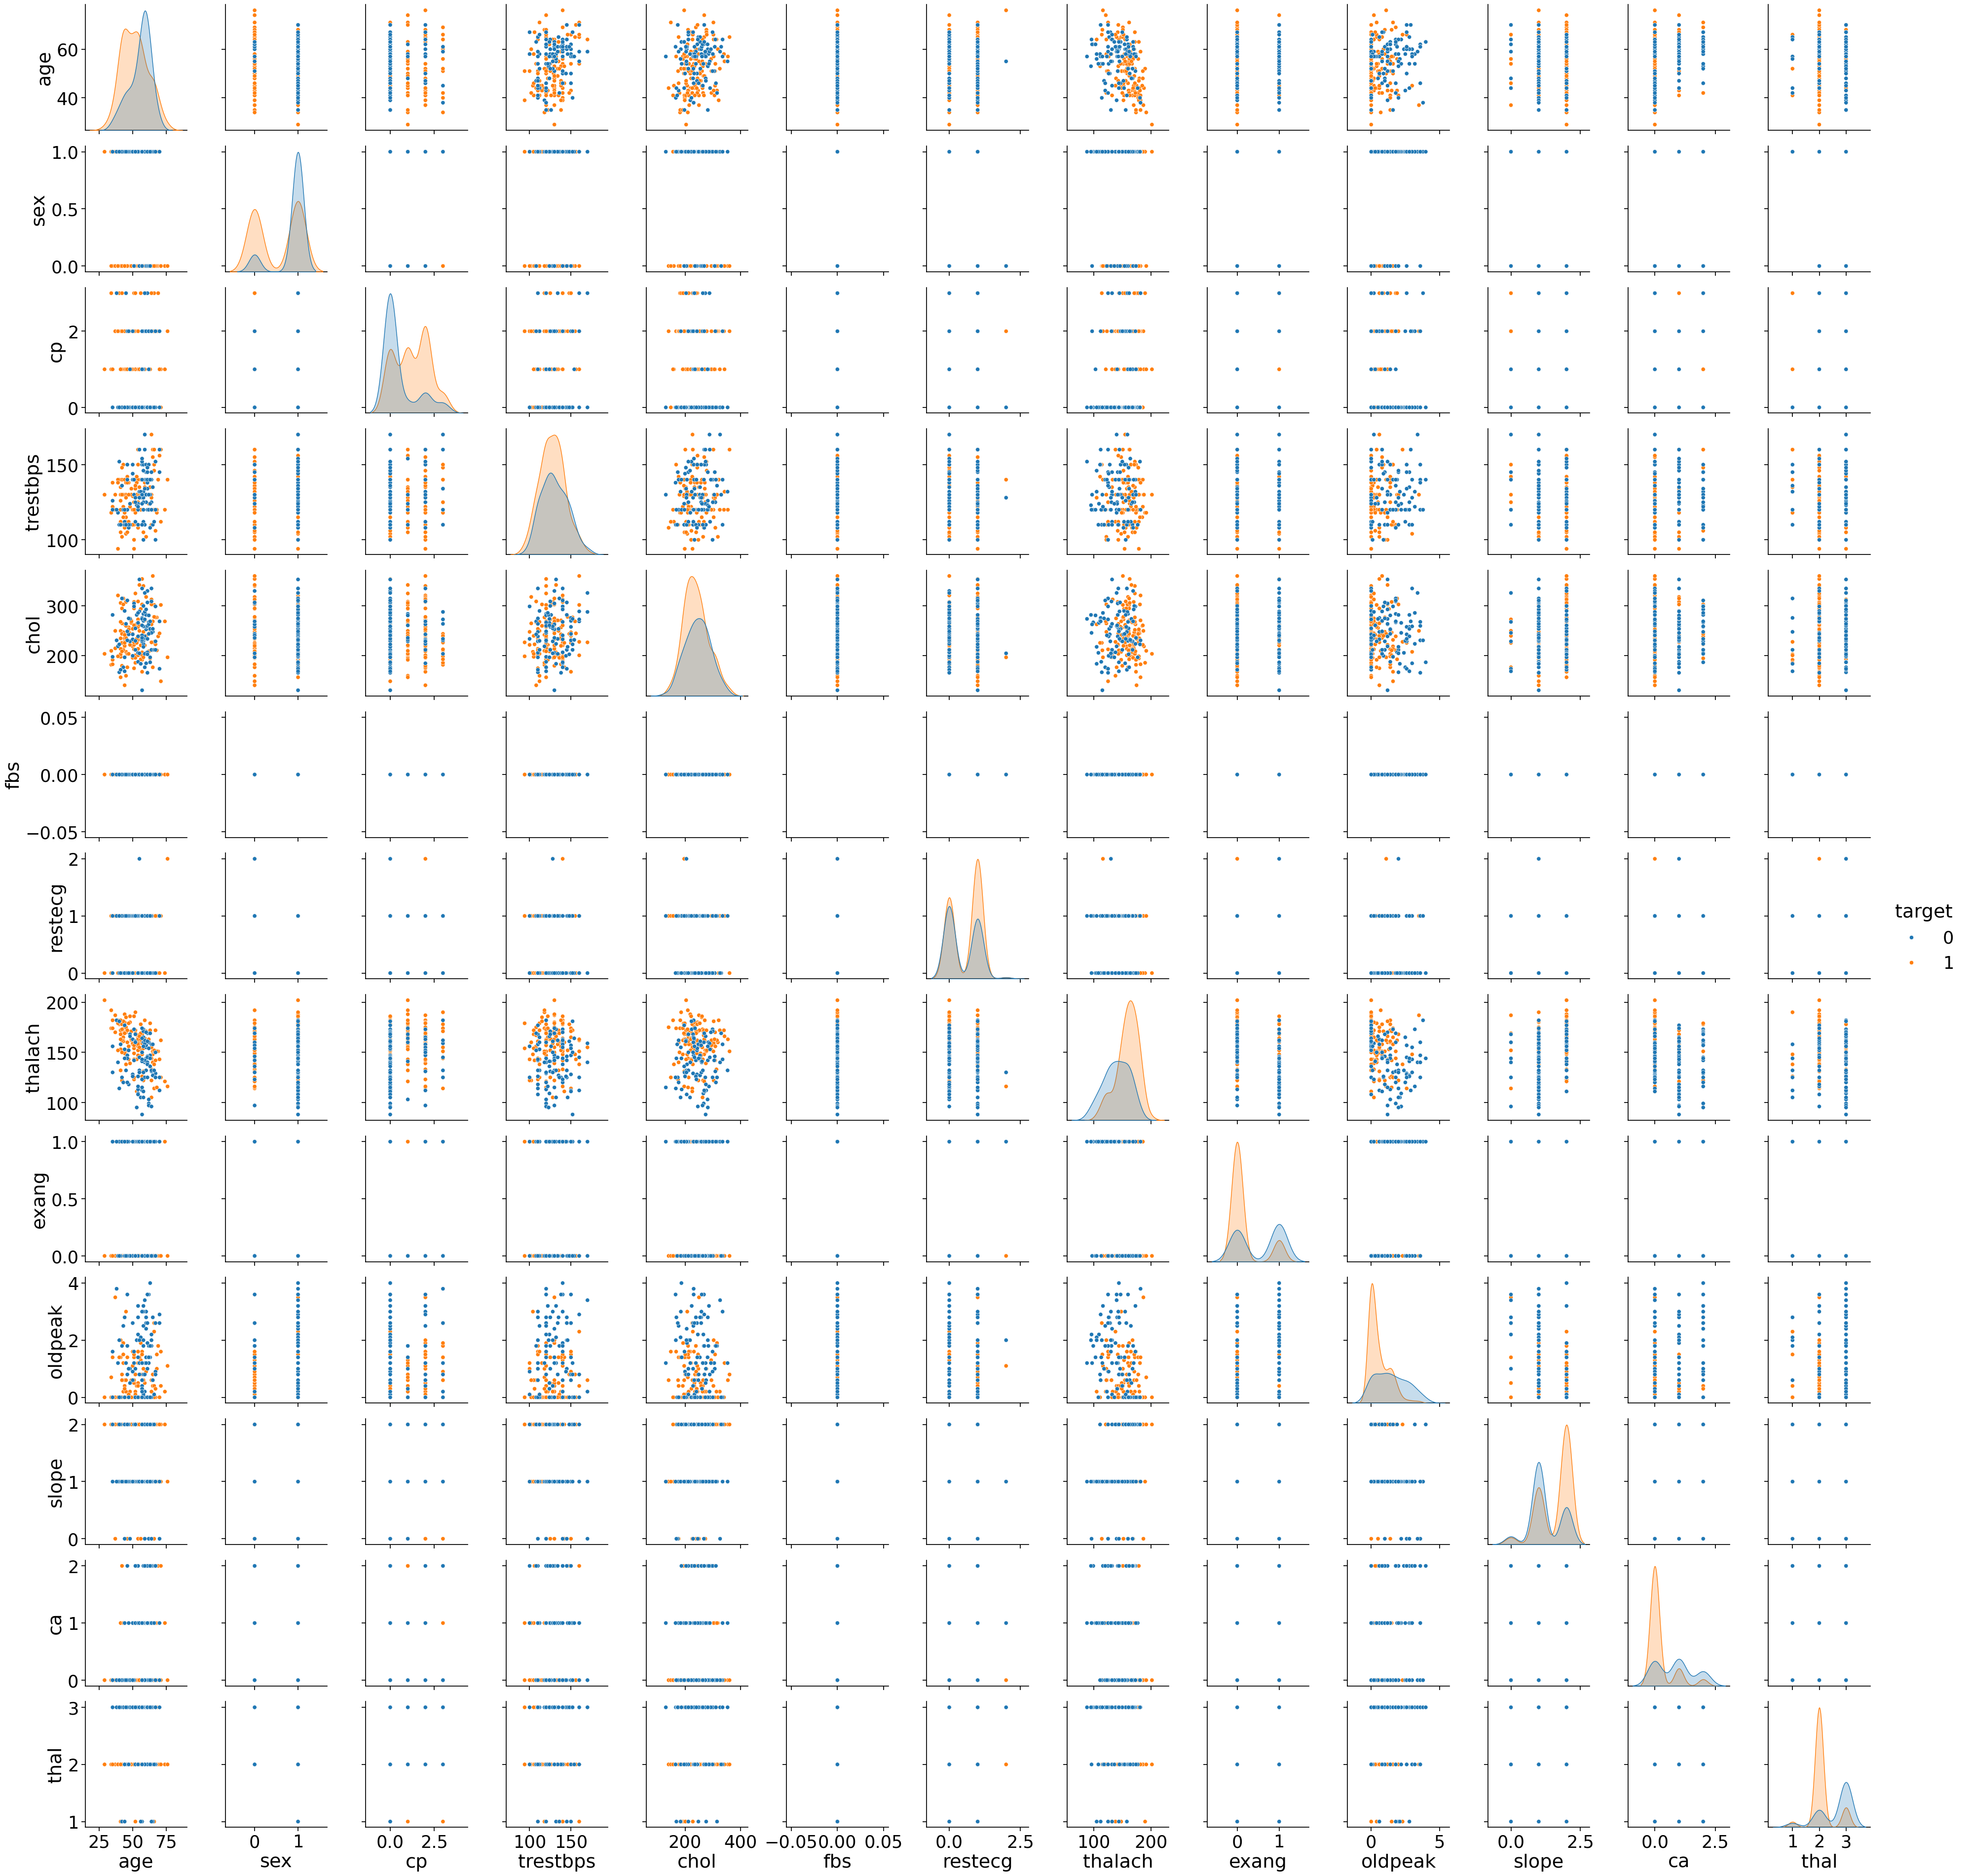

In [32]:
#visualization
sns.pairplot(df,hue="target",height=3,aspect=1);

In [33]:
#model selection
y= dataset['target']
x= dataset.drop(['target'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
#K - Nearest Neighbor classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train,y_train)
score = cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9130434782608695

In [38]:
score.mean()

0.8014619883040934

In [39]:
#hyper parameter tunning
knn_classifier = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                                      metric_params=None, n_jobs=1,n_neighbors=5,p=1,weights='uniform')
knn_classifier.fit(x_train,y_train)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)
#hence accuracy increases after Hyper parameter tunning


0.9782608695652174

In [40]:
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

0.8289473684210528

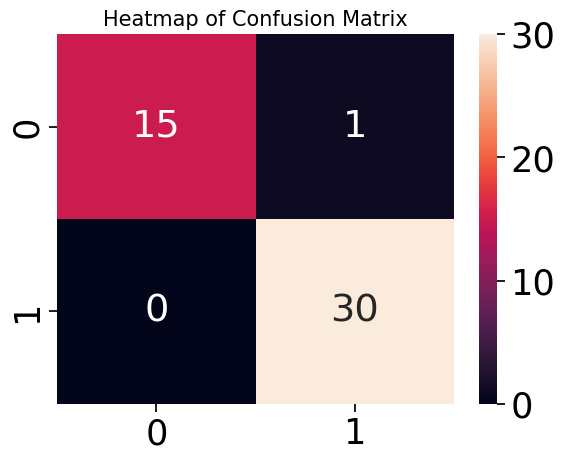

In [41]:
#confusion Metrix using heatmap
cm=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [42]:
#printing the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.97      1.00      0.98        30

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.98        46
weighted avg       0.98      0.98      0.98        46



In [43]:
# Random Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20 , criterion = 'entropy', random_state=51)
rf_classifier.fit(x_train,y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.8695652173913043

In [44]:
score=cross_val_score(rf_classifier,x_train,y_train,cv=10)
score.mean()

0.7906432748538011

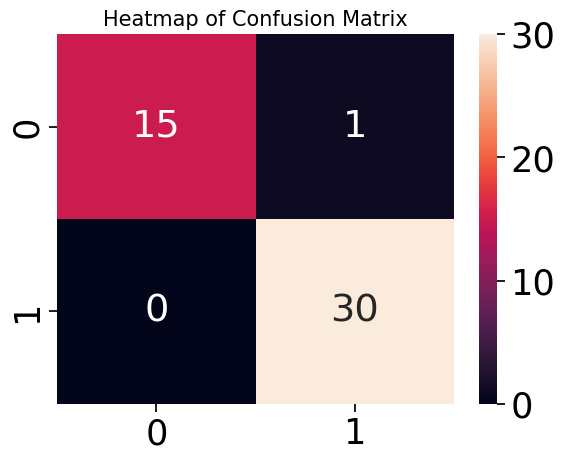

In [45]:
#confusion Metrix using heatmap
rf=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(rf,annot=True)
plt.show()

In [46]:
#XG BOOST
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=23,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.9347826086956522

In [47]:
score=cross_val_score(xgb_classifier,x_train,y_train,cv=10)
score.mean()


0.8184210526315789

In [48]:
#Ada Boosting With random forest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(x_train, y_train)

c:\Users\Chitt\Downloads\CSCE 5214\Heart Disease Prediction\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100)

In [49]:
y_pred_adb = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred_adb)

0.9347826086956522

In [50]:
score=cross_val_score(ada_clf,x_train,y_train,cv=10)
score.mean()

c:\Users\Chitt\Downloads\CSCE 5214\Heart Disease Prediction\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Chitt\Downloads\CSCE 5214\Heart Disease Prediction\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Chitt\Downloads\CSCE 5214\Heart Disease Prediction\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Chitt\Downloads\CSCE 5214\Heart Disease Prediction\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

0.7906432748538013

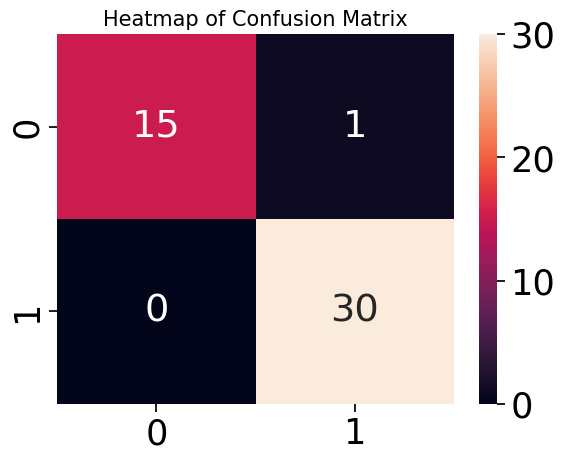

In [51]:
#confusion Metrix using heatmap
ada=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(ada,annot=True)
plt.show()

In [52]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [53]:
y_pred_adb = gbc_clf.predict(x_test)
accuracy_score(y_test, y_pred_adb)

0.8913043478260869

In [54]:
score=cross_val_score(gbc_clf,x_train,y_train,cv=10)
score.mean()

0.7853801169590643

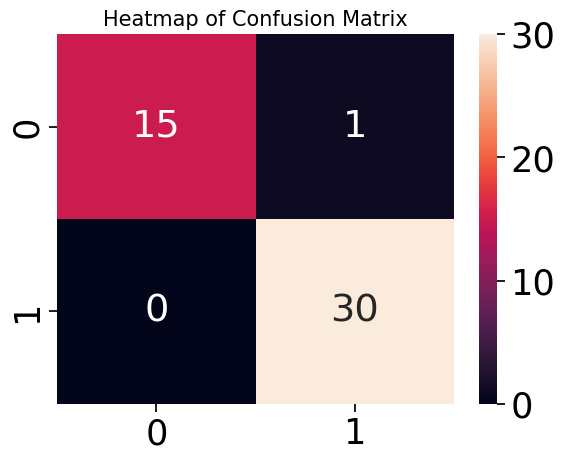

In [55]:
#confusion Metrix using heatmap
gbc=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(gbc,annot=True)
plt.show()

In [56]:
## Pickle
from xgboost import XGBClassifier
import pickle
import joblib

'''
filename='heart'
pickle.dump(knn_classifier,open(filename,'wb'))

# save model
#pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open(filename,'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))'''


"\nfilename='heart'\npickle.dump(knn_classifier,open(filename,'wb'))\n\n# save model\n#pickle.dump(knn_classifier, open('model.pkl', 'wb'))\n\n# load model\nHeart_disease_detector_model = pickle.load(open(filename,'rb'))\n\n# predict the output\ny_pred = Heart_disease_detector_model.predict(x_test)\n\n# confusion matrix\nprint('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')\n\n# show the accuracy\nprint('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))"

In [ ]:
import pickle
import joblib
# saving our model # model - model , filename-model_jlib
joblib.dump(knn_classifier, 'model_jlib')


# opening the file- model_jlib
Heart_disease_detector_model = joblib.load('model_jlib')

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))

Confusion matrix of K – Nearest Neighbor model: 
 [[15  1]
 [ 0 30]] 

Accuracy of K – Nearest Neighbor  model =  0.9782608695652174


In [ ]:
import pickle
pickle.dump(knn_classifier,open('heart_model.pkl','wb'))